# **Project1: BOSTON Housing Dataset Predn Using Linear regression**

## Dataset Discription

The Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

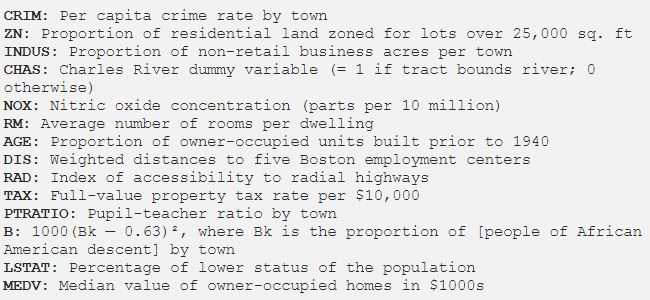

## **Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,r2_score,mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Step1: Data Collection**

In [ ]:
df=pd.read_csv("/content/drive/My Drive/PythonBoss/ML Project/Boston Dataset Predn using Linear regression/Boston.csv")
df.head()

crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

## **Step2: Data Cleaning & EDA**

In [ ]:
df.describe()

crim          zn       indus  ...       black       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64
crim       float64
zn         float

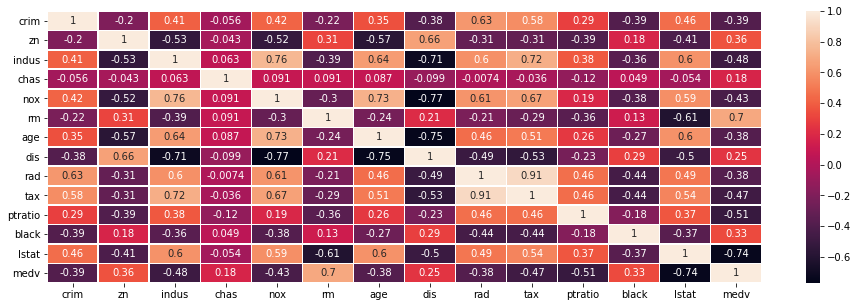

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),annot=True,linewidths=.75)

**correlation:**
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

*Observations:*

- To fit a linear regression model, we select those features which have a high correlation with our target variable

- By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

- An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.


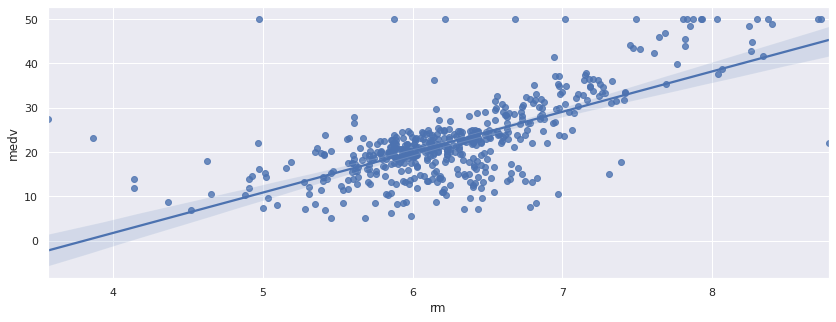

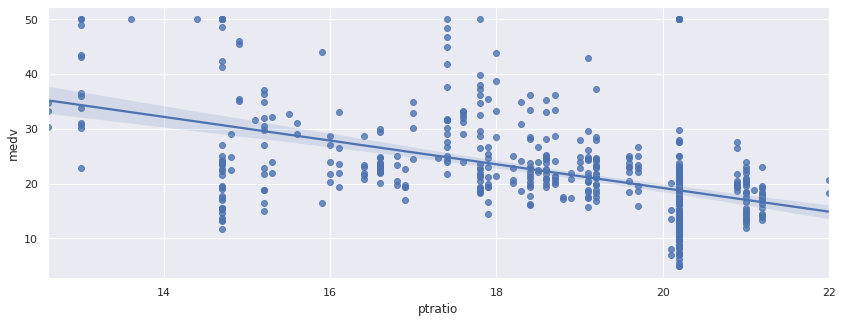

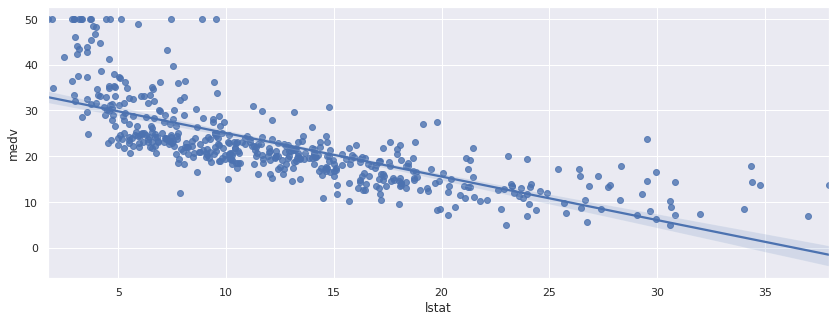

In [ ]:
for var in data.columns:
    sns.regplot(data[var],target)
    plt.show()

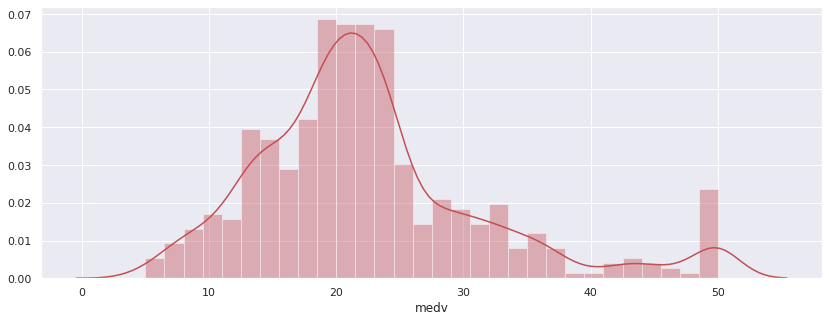

In [ ]:
sns.set(rc={'figure.figsize':(14,5)})
sns.distplot(df['medv'], bins=30,color='r')
plt.show()

**sns.distplot**

-to see the distribution of the target variable
-We see that the values of MEDV are distributed normally with few outliers

In [ ]:
data=df.iloc[:,[5,10,12]]
data.head()

rm  ptratio  lstat
0  6.575     15.3   4.98
1  6.421     17.8   9.14
2  7.185     17.8   4.03
3  6.998     18.7   2.94
4  7.147     18.7   5.33

In [ ]:
target=df.iloc[:,[-1]]
target.head()

medv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

## **Step3: Modeling**

In [ ]:
lir_model=LinearRegression()

## **Step4: Training & Test**

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(data,target,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 3)
(102, 3)
(404, 1)
(102, 1)


### Step4b: To train the model use model.fit

In [ ]:
histy=lir_model.fit(x_train,y_train)
print(histy)
lir_model.score(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


0.6584964167915986

## **Step5: Evaluate the model**

In [ ]:
lir_model.score(x_test,y_test)


0.7595476347126794

In [ ]:
# model evaluation for testing set

print("coef_ is {}".format(lir_model.coef_))
print("intercept is {}".format(lir_model.intercept_))

r2=r2_score(y_test,predn)
rmse = (np.sqrt(mean_squared_error(y_test,predn)))

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


coef_ is [[ 4.81984148 -0.67207037]]
intercept is [0.69858227]
RMSE is 4.8614325964292755
R2 score is 0.7175039832076542


## **Step6: Hyper Parameter Tunning**

## **Step7: Model Predictions**

In [ ]:
predn=lir_model.predict(x_test)
predn2=lir_model.predict(x_train)

predn,y_test

(array([[23.28184019],
        [20.94912323],
        [31.04679242],
        [28.57694973],
        [ 1.72481036],
        [ 1.29314948],
        [27.71662104],
        [28.25844765],
        [20.12849692],
        [24.54140652],
        [29.86093087],
        [27.41494729],
        [23.10736246],
        [16.93388227],
        [16.03682226],
        [25.87167752],
        [17.69373005],
        [11.8445267 ],
        [11.5953217 ],
        [18.43190633],
        [24.54679075],
        [19.08601462],
        [34.47064852],
        [20.0538436 ],
        [19.98110384],
        [17.11033126],
        [37.92122418],
        [36.04103345],
        [31.96778146],
        [25.84030256],
        [17.24509037],
        [22.6067532 ],
        [32.09311657],
        [29.63278324],
        [12.52579163],
        [20.86757244],
        [11.01641425],
        [20.97042322],
        [24.70036018],
        [23.11649132],
        [28.00623275],
        [11.95967623],
        [30.79143734],
        [ 4

### Visuallization- Prediction vs Actual x_training data of feature='rm' and target='medv'

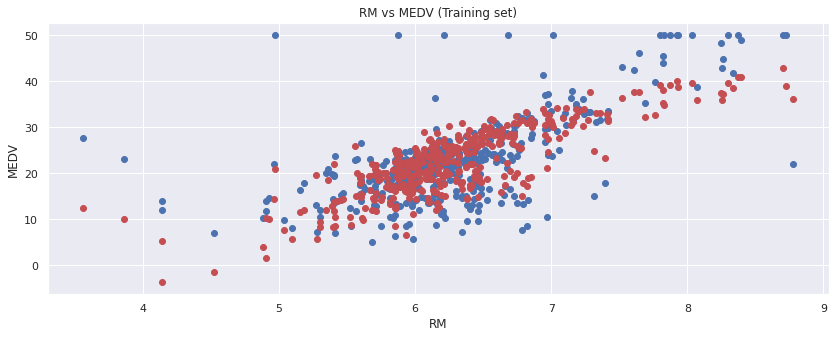

In [ ]:
rm_actual=x_train['rm']
medv=y_train['medv']
plt.scatter(rm_actual,medv)#Actual X_training data of rm vs Y_training on rm data

plt.scatter(rm_actual,predn2,color='r')#Actual X_training data of rm vs prediction on X_training data

plt.title('RM vs MEDV (Training set)')
plt.xlabel('RM') 
plt.ylabel('MEDV') 
plt.show()

### Visuallization- Prediction vs Actual x_training data of feature='lstat' and target='medv'

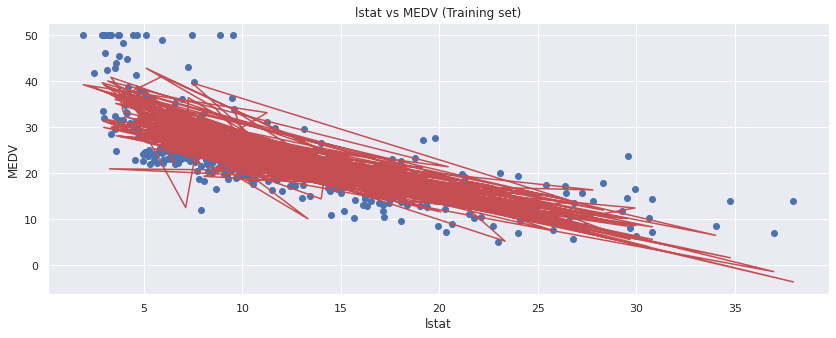

In [ ]:
lstat_actual=x_train['lstat']
medv=y_train['medv']
plt.scatter(lstat_actual,medv)#Actual X_training data of rm vs Y_training on lstat data

plt.plot(lstat_actual,predn2,color='r')#Actual X_training data of lstat vs prediction on X_training data

plt.title('lstat vs MEDV (Training set)')
plt.xlabel('lstat') 
plt.ylabel('MEDV') 
plt.show()

*prediction example*

In [ ]:
new=[[6.998,18.7,2.94]]
lir_model.predict(new)

array([[31.25185254]])